In [2]:
# ******* True running program *******

# Generate the augmentated images and its corresponding bbox coordinates, and write everything in an Excel file.
# This notebook is for training set
# This notebook is for Random Rotation

### Import necessary packages

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import pydicom as dicom
from PIL import Image, ImageMath
import cv2 
import skimage.color
import os
import random
import pandas as pd
from data_aug.data_aug import *
from data_aug.bbox_util import *
import pickle as pkl

### Prprocessing

In [8]:
# Original images path and their cooresponding bbox coordinates.

file_path = r'D:\Studying\RetinaNet_Project_csv\csv_files_for_my_onw_pc\original_data_set\training_set\training_set_only_mass.xlsx'
data_frame = pd.read_excel(file_path)
image_path_dataframe = data_frame['image_path']
print(image_path_dataframe)
# List for storing all image path
image_path_list = np.array(image_path_dataframe).tolist()
# List for storing their corresponding bounding boxes coordinates
bbox_coordinates_dataframe = pd.read_excel(file_path, usecols=[1,2,3,4], names=None)
print(bbox_coordinates_dataframe)
bbox_coordinates_array = np.array(bbox_coordinates_dataframe)
bbox_coordinates_array = np.float64(bbox_coordinates_array)
# print(bbox_coordinates_array)
bbox_coordinates_array_temp = np.float64(np.zeros([107,5]))
bbox_coordinates_array_temp[:,0:4] = bbox_coordinates_array
bbox_coordinates_array = bbox_coordinates_array_temp
print(bbox_coordinates_array)

0      D:\Studying\RetinaNet_Project\all_DICOM_files\...
1      D:\Studying\RetinaNet_Project\all_DICOM_files\...
2      D:\Studying\RetinaNet_Project\all_DICOM_files\...
3      D:\Studying\RetinaNet_Project\all_DICOM_files\...
4      D:\Studying\RetinaNet_Project\all_DICOM_files\...
                             ...                        
102    D:\Studying\RetinaNet_Project\all_DICOM_files\...
103    D:\Studying\RetinaNet_Project\all_DICOM_files\...
104    D:\Studying\RetinaNet_Project\all_DICOM_files\...
105    D:\Studying\RetinaNet_Project\all_DICOM_files\...
106    D:\Studying\RetinaNet_Project\all_DICOM_files\...
Name: image_path, Length: 107, dtype: object
     x_top_left  y_top_left  x_bot_right  y_bot_right
0          1994        1695         2448         2271
1           583        2457          736         2589
2          1888        1077         2098         1301
3           356        2107          493         2274
4           276        1162          795         1641
..  

### Random Rotation

In [11]:
# Start Random Rotation

# Empty dataframe
df = pd.DataFrame() 

# Do random rotation three times for each image
number_of_rotation_for_each_image = 2
# Final array for storing all bbox coordinates.
bbox_coordinates_array_random_rotation_final = np.zeros([107*number_of_rotation_for_each_image, 4])
file_path_array_pd = []

# Outter loop for number of transforms done for each image.
for i in range(number_of_rotation_for_each_image):
    bbox_coordinates_array_random_rotation_temp = np.zeros([107, 4])
    for j in range(107):

        file_path_temp = image_path_list[j]
        bbox_coordinate_temp = np.array([bbox_coordinates_array_temp[j]])

        # Read the dicom image
        original_dicom = dicom.dcmread(file_path_temp)
        original_data = original_dicom.pixel_array
        dicom_image_size = original_data.shape
        print("Processing number ", j, " images...", i, " iteration...")
        print(dicom_image_size)
        print(dicom_image_size[0])

        # Path of the saved augmentated images.
        saving_path = r'D:\Studying\RetinaNet_Project_test_agumentations\training_augmentations\Random_rotate' 
        # This is the sequence number of the dicom image
        saving_folder = '\\'+ file_path_temp.split('\\')[-1][0:-34]
        # If this directory does not exist, create it at first time.
        if not (os.path.exists(saving_path + saving_folder)):
            os.mkdir(saving_path + saving_folder)

        # Use scikit to duplicate the image channel
        three_channel_image = skimage.color.gray2rgb(original_data)
        img_, bboxes_ = RandomRotate(20)(three_channel_image.copy(), bbox_coordinate_temp.copy())

        img_rotate_temp = img_[:,:,0].copy()
        image_name = r'\temp_dicom_{}_random_rotation_{}.tif'.format(saving_folder[1:], i)
        Image.fromarray(img_rotate_temp).save(saving_path + saving_folder + image_name)
        # Save current temp file path to the data frame array
        file_path_array_pd.append(saving_path + saving_folder + image_name)
        bbox_coordinates_array_random_rotation_temp[j, :] = [np.int(bboxes_[0,0]), np.int(bboxes_[0,1]), np.int(bboxes_[0,2]), np.int(bboxes_[0,3])]
    bbox_coordinates_array_random_rotation_final[107*i: 107*i+107 ,:] = bbox_coordinates_array_random_rotation_temp

print(bbox_coordinates_array_random_rotation_final)
df = pd.DataFrame(bbox_coordinates_array_random_rotation_final)
df['file path'] = file_path_array_pd
print(df)
writer = pd.ExcelWriter('Random_rotation.xlsx')
df.to_excel(writer)
writer.save()

Processing number  0  images... 0  iteration...
(3328, 2560)
3328
Processing number  1  images... 0  iteration...
(4084, 3328)
4084
Processing number  2  images... 0  iteration...
(3328, 2560)
3328
Processing number  3  images... 0  iteration...
(3328, 2560)
3328
Processing number  4  images... 0  iteration...
(3328, 2560)
3328
Processing number  5  images... 0  iteration...
(4084, 3328)
4084
Processing number  6  images... 0  iteration...
(3328, 2560)
3328
Processing number  7  images... 0  iteration...
(3328, 2560)
3328
Processing number  8  images... 0  iteration...
(4084, 3328)
4084
Processing number  9  images... 0  iteration...
(4084, 3328)
4084
Processing number  10  images... 0  iteration...
(3328, 2560)
3328
Processing number  11  images... 0  iteration...
(4084, 3328)
4084
Processing number  12  images... 0  iteration...
(4084, 3328)
4084
Processing number  13  images... 0  iteration...
(4084, 3328)
4084
Processing number  14  images... 0  iteration...
(3328, 2560)
3328
Proce

Processing number  16  images... 1  iteration...
(4084, 3328)
4084
Processing number  17  images... 1  iteration...
(4084, 3328)
4084
Processing number  18  images... 1  iteration...
(3328, 2560)
3328
Processing number  19  images... 1  iteration...
(3328, 2560)
3328
Processing number  20  images... 1  iteration...
(3328, 2560)
3328
Processing number  21  images... 1  iteration...
(4084, 3328)
4084
Processing number  22  images... 1  iteration...
(4084, 3328)
4084
Processing number  23  images... 1  iteration...
(4084, 3328)
4084
Processing number  24  images... 1  iteration...
(4084, 3328)
4084
Processing number  25  images... 1  iteration...
(3328, 2560)
3328
Processing number  26  images... 1  iteration...
(3328, 2560)
3328
Processing number  27  images... 1  iteration...
(3328, 2560)
3328
Processing number  28  images... 1  iteration...
(3328, 2560)
3328
Processing number  29  images... 1  iteration...
(4084, 3328)
4084
Processing number  30  images... 1  iteration...
(4084, 3328)


### Test for the correctness of random rotation here

<class 'numpy.uint16'>
<class 'numpy.uint16'>
[2232.  824. 2463. 1078.    0.]


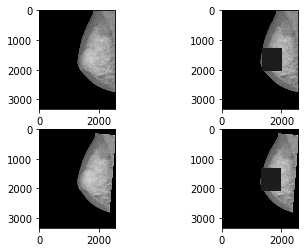

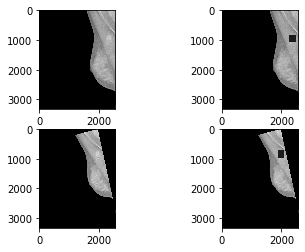

In [15]:
# Choose one to see whether it is correct.
# Status: Pass
# Possible problem: Integer or Float?

rotated_image = Image.open(r'D:\Studying\RetinaNet_Project_test_agumentations\training_augmentations\Random_rotate\20587928\temp_dicom_20587928_random_rotation_1.tif')
rotated_image = np.array(rotated_image)
print(type(rotated_image[0,1]))
original_dicom = dicom.dcmread(image_path_list[93])
original_data = original_dicom.pixel_array

plt.figure(1)

# Original image
plt.subplot2grid((2,2), (0,0))
plt.imshow(original_data, cmap='gray')
# Its bbox
plt.subplot2grid((2,2), (0,1))
cv2.rectangle(original_data, (int(bbox_coordinates_array[93,0]),int(bbox_coordinates_array[93,1])),(int(bbox_coordinates_array[93,2]), int(bbox_coordinates_array[93,3])), (255,0,0), -1)
plt.imshow(original_data, cmap='gray')

# Rotated image
plt.subplot2grid((2,2),(1,0))
plt.imshow(rotated_image, cmap='gray')
# Its bbox
plt.subplot2grid((2,2), (1,1))
cv2.rectangle(rotated_image, (int(bbox_coordinates_array_random_rotation_final[200,0]), int(bbox_coordinates_array_random_rotation_final[200,1])), (int(bbox_coordinates_array_random_rotation_final[200,2]), int(bbox_coordinates_array_random_rotation_final[200,3])), (255,0,0), -1)
plt.imshow(rotated_image, cmap='gray')



# Another image
rotated_image = Image.open(r'D:\Studying\RetinaNet_Project_test_agumentations\training_augmentations\Random_rotate\50994354\temp_dicom_50994354_random_rotation_0.tif')
rotated_image = np.array(rotated_image)
print(type(rotated_image[0,1]))
original_dicom = dicom.dcmread(image_path_list[70])
original_data = original_dicom.pixel_array

plt.figure(2)

# Original image
plt.subplot2grid((2,2), (0,0))
plt.imshow(original_data, cmap='gray')
# Its bbox
plt.subplot2grid((2,2), (0,1))
cv2.rectangle(original_data, (int(bbox_coordinates_array[70,0]),int(bbox_coordinates_array[70,1])),(int(bbox_coordinates_array[70,2]), int(bbox_coordinates_array[70,3])), (255,0,0), -1)
print(bbox_coordinates_array[70])
plt.imshow(original_data, cmap='gray')

# Rotated image
plt.subplot2grid((2,2),(1,0))
plt.imshow(rotated_image, cmap='gray')
# Its bbox
plt.subplot2grid((2,2), (1,1))
cv2.rectangle(rotated_image, (int(bbox_coordinates_array_random_rotation_final[70,0]), int(bbox_coordinates_array_random_rotation_final[70,1])), (int(bbox_coordinates_array_random_rotation_final[70,2]), int(bbox_coordinates_array_random_rotation_final[70,3])), (255,0,0), -1)
plt.imshow(rotated_image, cmap='gray')

